# Identify fraudulent credit card transactions
### Rihad Variawa
### 09-03-2019

The dataset used for this analysis can be found using the following [link](https://www.kaggle.com/mlg-ulb/creditcardfraud)

## About the Dataset
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, its recommend we measure the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

The dataset has been collected and analysed during a research collaboration of Worldline and the [Machine Learning Group](http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection. 

## Purpose of this analysis
To identify fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

## Loading Packages

In [0]:
# for data manipulation 
import pandas as pd  
import numpy as np 

# for visualization
import seaborn as sns 

# to plot the graphs
import matplotlib.pyplot as plt 

# to do the grid of plots
import matplotlib.gridspec as gridspec 

## Import Dataset

In [0]:
from google.colab import files
uploaded = files.upload()

Saving creditcardfraud.zip to creditcardfraud.zip


In [0]:
!ls
!unzip creditcardfraud.zip

creditcardfraud.zip  sample_data
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [0]:
# loading the data
credit = pd.read_csv("creditcard.csv")

## Exploratory Data Analysis

In [0]:
# to see features
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [0]:
# looking at the type and searching for null values
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

* **Due to confidentiality issues, we cannot provide the original features and more background information about the data.**
* Features V1, V2, ... V28 are the principal components obtained with PCA.

The only features which have not been transformed with PCA:

* Feature **Time** contains the seconds elapsed between each transaction and the first transaction in the dataset.
* Feature **Amount** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.
* Feature **Class** is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [0]:
# data is stardarized, I will explore them later
# let's preview time, amount and class columns
credit[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


## Firstly, I will explore through 3 different columns:
- Time
- Amount
- Class

Distribuition of Normal(0) and Fraud(1): 
0    284315
1       492
Name: Class, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


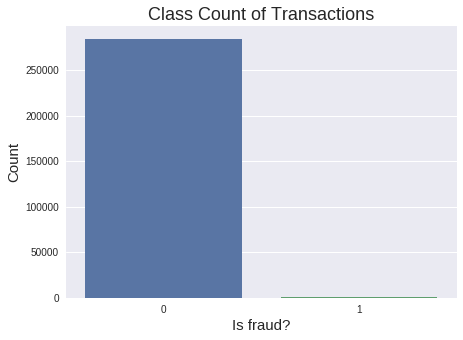

In [0]:
# let's start by looking at the difference between 'Normal' and 'Fraud' transactions
print("Distribuition of Normal(0) and Fraud(1): ")
print(credit["Class"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(credit['Class'])
plt.title("Class Count of Transactions", fontsize=18)
plt.xlabel("Is fraud?", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

We have a clearly imbalanced dataset, common when dealing with fraud type transactions.

* Firstly, let's explore the **Time** and **Amount** features.
* Lastly, we'll explore the **V's** features, that are PCA. 

## Feature Engineering

### Time Feature
As our **Time** feature is in seconds. We'll transform it to minutes and hours to get a better understand of the patterns.

In [0]:
timedelta = pd.to_timedelta(credit['Time'], unit='s')
credit['Time_min'] = (timedelta.dt.components.minutes).astype(int)
credit['Time_hour'] = (timedelta.dt.components.hours).astype(int)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


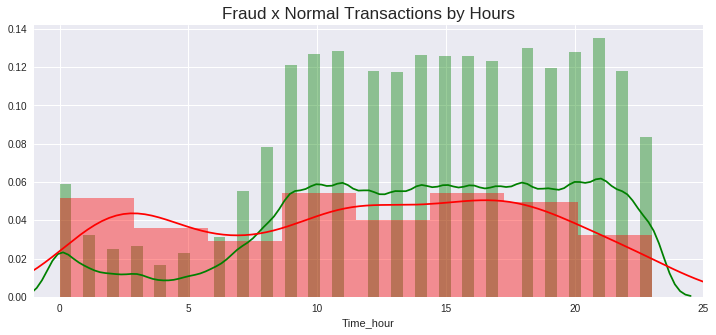

In [0]:
# explore the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(credit[credit['Class'] == 0]["Time_hour"], 
             color='g')
sns.distplot(credit[credit['Class'] == 1]["Time_hour"], 
             color='r')
plt.title('Fraud x Normal Transactions by Hours', fontsize=17)
plt.xlim([-1,25])
plt.show()

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


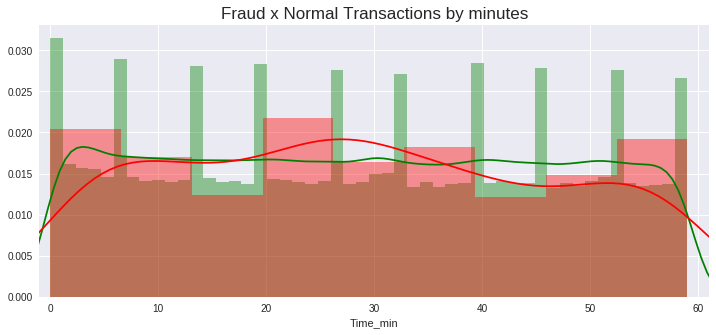

In [0]:
# explore the distribuition by Class types throught hours and minutes
plt.figure(figsize=(12,5))
sns.distplot(credit[credit['Class'] == 0]["Time_min"], 
             color='g')
sns.distplot(credit[credit['Class'] == 1]["Time_min"], 
             color='r')
plt.title('Fraud x Normal Transactions by minutes', fontsize=17)
plt.xlim([-1,61])
plt.show()

* Interesting distribuition, however does not sounds like a clear pattern of action.

## Amount Feature
### Looking at statistics about Amount class normal and fraud transactions

In [0]:
# data containing normal and fraud
df_fraud = credit[credit['Class'] == 1]
df_normal = credit[credit['Class'] == 0]

print("Fraud Transaction Statistics")
print(df_fraud["Amount"].describe())

print("\nNormal Transaction Statistics")
print(df_normal["Amount"].describe())

Fraud Transaction Statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

Normal Transaction Statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


* Interesting.
* Using this information we can filter the values to look for **Amount** by Class.
* Filter **normal** amounts by 3.000

In [0]:
# feature engineering to better visualize the values
credit['Amount_log'] = np.log(credit.Amount + 0.01)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


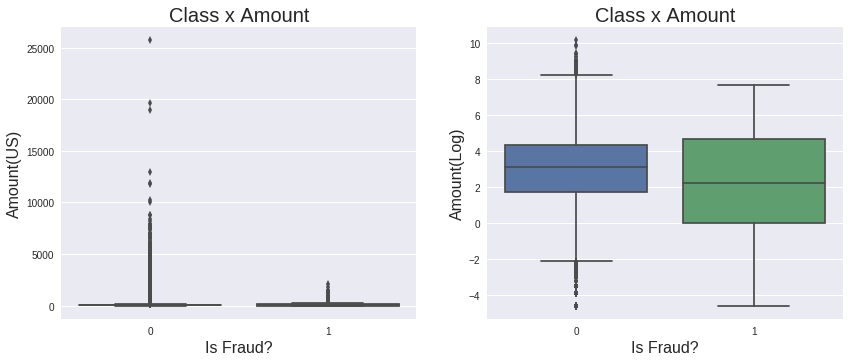

In [0]:
plt.figure(figsize=(14,6))

# explore the Amount by Class and see the distribuition of Amount transactions
plt.subplot(121)
ax = sns.boxplot(x = "Class",y = "Amount",
                 data = credit)
ax.set_title("Class x Amount", fontsize=20)
ax.set_xlabel("Is Fraud?", fontsize=16)
ax.set_ylabel("Amount(US)", fontsize = 16)

plt.subplot(122)
ax1 = sns.boxplot(x = "Class", y = "Amount_log", data = credit)
ax1.set_title("Class x Amount", fontsize=20)
ax1.set_xlabel("Is Fraud?", fontsize=16)
ax1.set_ylabel("Amount(Log)", fontsize = 16)

plt.subplots_adjust(hspace = 0.6, top = 0.8)
plt.show()

* We can see a slightly difference in log amount of our two Classes.
* The IQR of fraudulent transactions are higher than normal transactions, but normal transactions have highest values

## Scatter plot of the Time_min distribuition by Amount

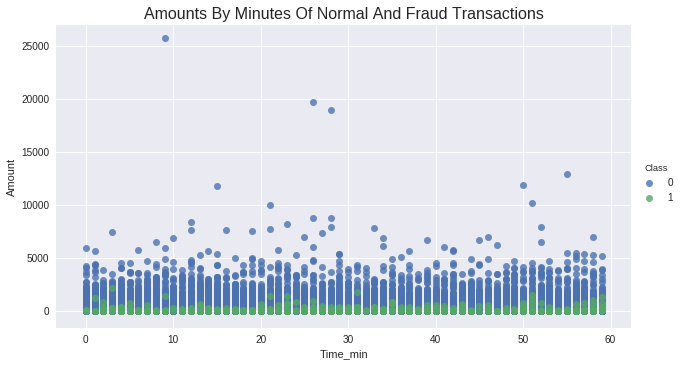

In [0]:
# amount and time distribuition of fraud transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False, aspect=1.8,
                data=credit, hue='Class')
plt.title("Amounts By Minutes Of Normal And Fraud Transactions", fontsize=16)
plt.show()

## Scatter plot of the Time_hour distribuition by Amount

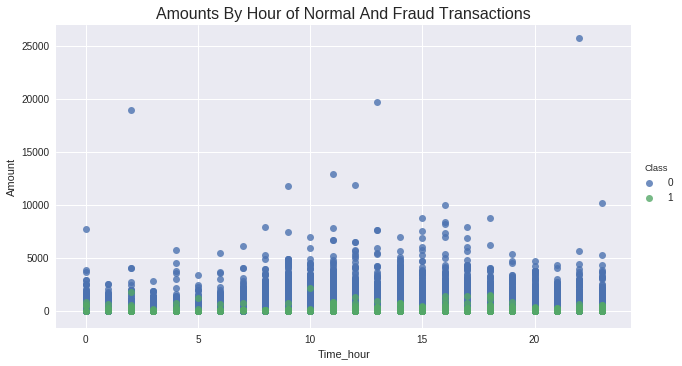

In [0]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=credit, hue='Class')
plt.title("Amounts By Hour of Normal And Fraud Transactions", fontsize=16)
plt.show()

## V Features
### Using boxplot to search differents distribuitions, we'll search for features that diverges from normal distribuition

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


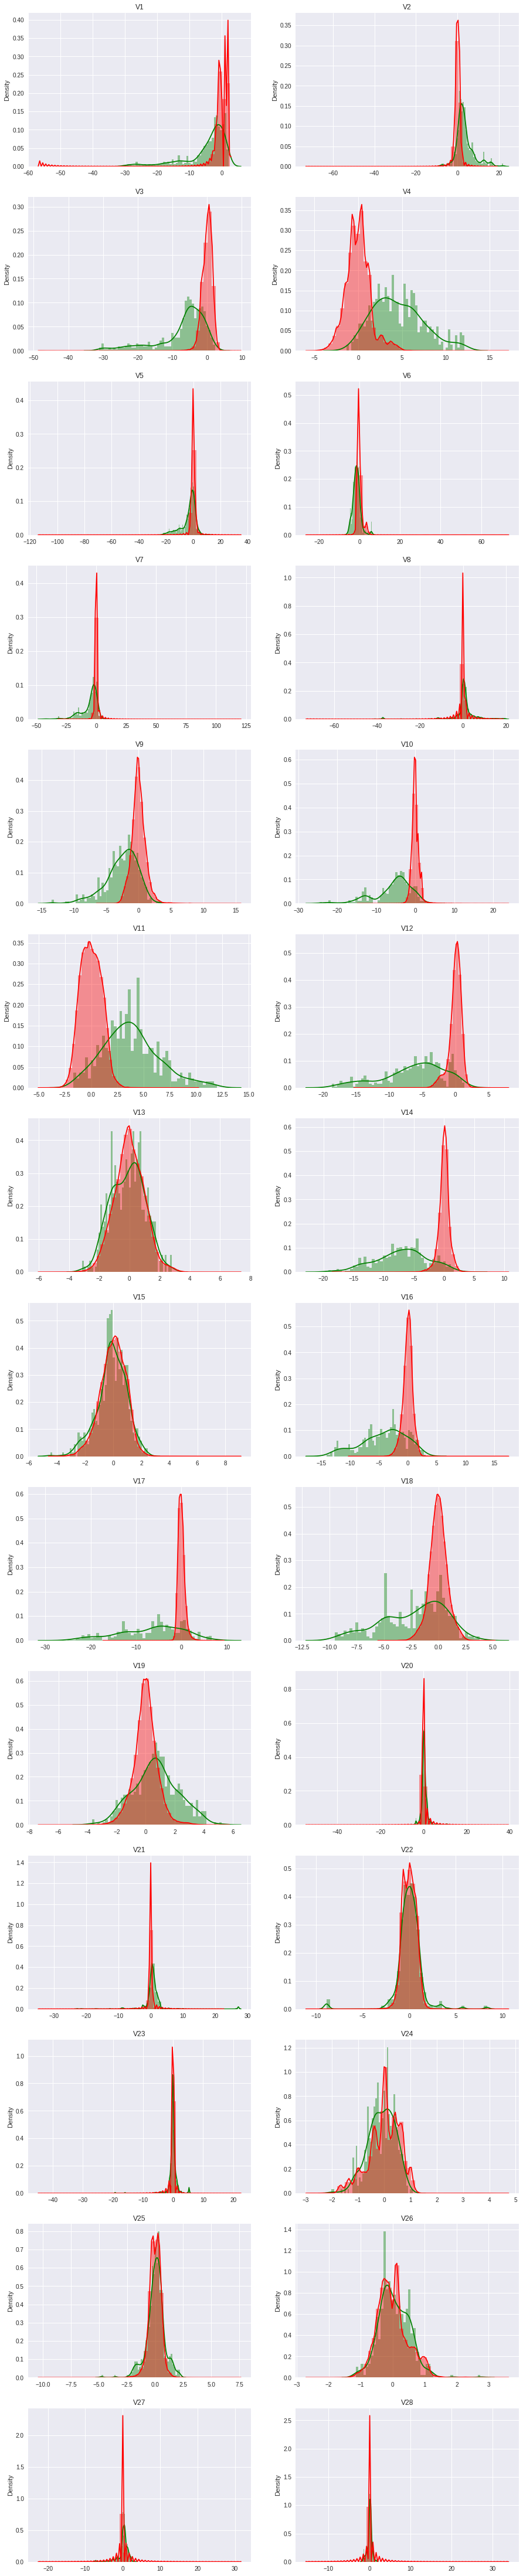

In [0]:
# preview V features
columns = credit.iloc[:,1:29].columns

frauds = credit.Class == 1
normals = credit.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(credit[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(credit[col][frauds], bins = 50, color='g') # will receive the "semi-salmon" violin
    sns.distplot(credit[col][normals], bins = 50, color='r') # will receive the "ocean" color
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
plt.show()

We can see an interesting difference of distribuition in some of our features like V4, V9, V16, V17 and a lot more. Now let's take a look on time distribuition.

## Difference in time

### Feature selections

In [0]:
# select the variables where fraud class has an interesting behavior and might help us to predict it
credit = credit[["Time_hour","Time_min","V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount","Class"]]

### Some Feature Engineering

In [0]:
credit.Amount = np.log(credit.Amount + 0.001)

In [0]:
# see final df
credit.head()

,Time_hour,Time_min,V2,V3,V4,V9,V10,V11,V12,V14,V16,V17,V18,V19,V27,Amount,Class
0,0,0,-0.072781,2.536347,1.378155,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,0.133558,5.008105,0
1,0,0,0.266151,0.166480,0.448154,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.008983,0.989913,0
2,0,0,-1.340163,1.773209,0.379780,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,-0.055353,5.936641,0
3,0,0,-0.185226,1.792993,-0.863291,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,0.062723,4.816249,0
4,0,0,0.877737,1.548718,0.403034,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,0.219422,4.248367,0


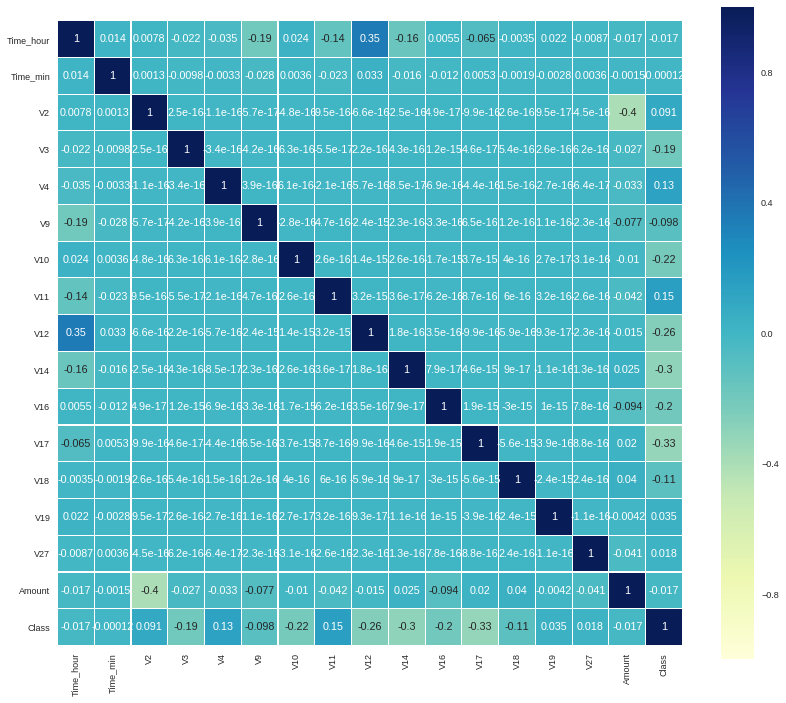

In [0]:
colormap = "YlGnBu"
plt.figure(figsize=(14,12))
sns.set(font_scale = 0.9)
sns.heatmap(credit.corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap = colormap, linecolor='white', annot=True)
plt.show()

## Preprocessing

In [0]:
# to do our transformation in a unique time
from imblearn.pipeline import make_pipeline as make_pipeline_imb 
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

from sklearn.model_selection import train_test_split
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve, accuracy_score


In [0]:
# setting the X to do the split
X = credit.drop(["Class"], axis=1).values 

# transforming the values in array
y = credit["Class"].values 

In [0]:
# function that we will use to better evaluate the model
def print_results(headline, true_value, pred):
    print(headline)
    print("accuracy: {}".format(accuracy_score(true_value, pred)))
    print("precision: {}".format(precision_score(true_value, pred)))
    print("recall: {}".format(recall_score(true_value, pred)))
    print("f2: {}".format(fbeta_score(true_value, pred, beta=2)))

# splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.20)

classifier = RandomForestClassifier

# build model with SMOTE imblearn
smote_pipeline = make_pipeline_imb(SMOTE(random_state=4), \
                                   classifier(random_state=42))

smote_model = smote_pipeline.fit(X_train, y_train)
smote_prediction = smote_model.predict(X_test)

# showing the difference before and after the transformation used
print("normal data distribution: {}".format(Counter(y)))
X_smote, y_smote = SMOTE().fit_sample(X, y)
print("SMOTE data distribution: {}".format(Counter(y_smote)))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


normal data distribution: Counter({0: 284315, 1: 492})
SMOTE data distribution: Counter({0: 284315, 1: 284315})


## Evaluating the model Random Forest and SMOTE

In [0]:
print("Confusion Matrix: ")
print(confusion_matrix(y_test, smote_prediction))

print('\nSMOTE Pipeline Score {}'.format(smote_pipeline.score(X_test, y_test)))

print_results("\nSMOTE + RandomForest classification", y_test, smote_prediction)

Confusion Matrix: 
[[56863    15]
 [   13    71]]

SMOTE Pipeline Score 0.9995084442259752

SMOTE + RandomForest classification
accuracy: 0.9995084442259752
precision: 0.8255813953488372
recall: 0.8452380952380952
f2: 0.8412322274881516


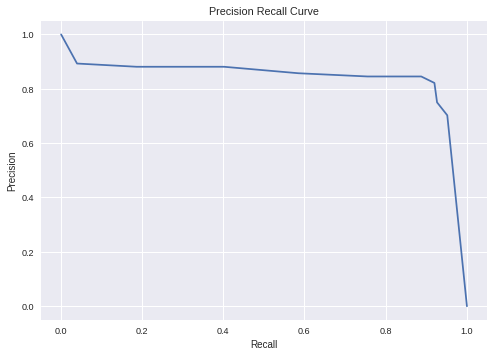

In [0]:
# compute predicted probabilities: y_pred_prob
y_pred_prob = smote_pipeline.predict_proba(X_test)[:,1]

# generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

* This ROC Curve is a overfitted curve, how can I fix this problem and get a correct??? 

In [0]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.20.3)


In [0]:
!pip install sklearn

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [0]:
# params of the model
param_grid = {"max_depth": [3,5, None],
              "n_estimators":[3,5,10],
              "max_features": [5,6,7,8]}

# creating the classifier
model = RandomForestClassifier(max_features=3, max_depth=2 ,n_estimators=10, random_state=3, criterion='entropy', n_jobs=1, verbose=1 )

In [0]:
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=3, verbose=1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, None], 'n_estimators': [3, 5, 10], 'max_features': [5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [0]:
print(grid_search.best_score_)
print(grid_search.best_params_)

0.7843718777184991
{'max_depth': 5, 'max_features': 7, 'n_estimators': 10}


In [0]:
# running the fit method
rf = RandomForestClassifier(max_depth=5, max_features = 7, n_estimators = 10)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
# print the training score
print("Training score data: ")
print(rf.score(X_train, y_train))

Training score data: 
0.9995347714455002


In [0]:
# Testing the model 
# predicting by X_test
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print_results("RF classification", y_test, y_pred)

[[56872     6]
 [   14    70]]
RF classification
accuracy: 0.9996488887328394
precision: 0.9210526315789473
recall: 0.8333333333333334
f2: 0.8495145631067962


* **85% accuracy obtained from Random Forest.**

## Feature Importance Plot

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


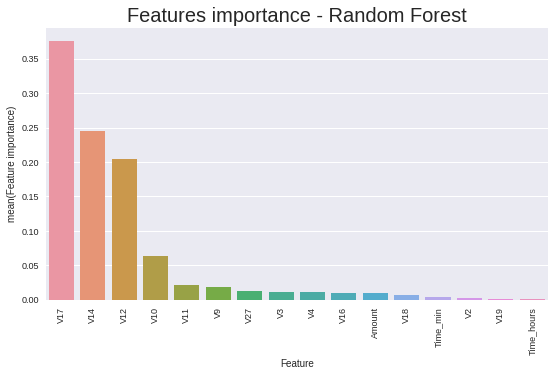

In [0]:
features = ["Time_min", 'Time_hours',"V2","V3","V4","V9","V10","V11","V12","V14","V16","V17","V18","V19","V27","Amount"]

# Credits to Gabriel Preda
# https://www.kaggle.com/gpreda/credit-card-fraud-detection-predictive-models
plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': rf.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

* The top 4 feature are V17, V14, V12, V10 corresponds to 75% of total. 
* Also the f2 score that is the median of recall and precision are on a considerably value.

## ROC CURVE - Random Forest
*   List item
*   List item

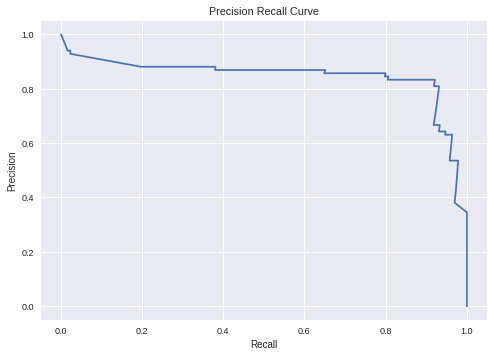

In [0]:
# predicting probability
y_pred_prob = rf.predict_proba(X_test)[:,1]

# generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

In [0]:
from sklearn.model_selection import cross_val_score

In [0]:
results = cross_val_score(rf,X_train, y_train, cv=10, scoring='recall')
results

array([0.75609756, 0.70731707, 0.70731707, 0.65853659, 0.7804878 ,
       0.7804878 , 0.75609756, 0.80487805, 0.8       , 0.75      ])

## Modelling Logistic Regression With Hyperparameters

In [0]:
param_grid = {'C': [0.01, 0.1, 1, 10],
             'penalty':['l1', 'l2']}

logreg = LogisticRegression(random_state=2)

grid_search_lr = GridSearchCV(logreg, param_grid=param_grid, scoring='recall', cv=5)

grid_search_lr.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=2, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [0]:
# the best recall obtained
print(grid_search_lr.best_score_)

# best params on trainning set
print(grid_search_lr.best_params_)

0.602830517682702
{'C': 1, 'penalty': 'l2'}


### Setting the best parameters as parameters for our model

In [0]:
# creating the model 
logreg = LogisticRegression(C=10, penalty='l2',random_state=2)

# fiting the model
logreg.fit(X_train, y_train)
           
# printing the training score
print("Cross Validation of X and y Train: ")
print(cross_val_score(logreg,X_train, y_train, cv=5, scoring='recall'))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Cross Validation of X and y Train: 


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

[0.58536585 0.58536585 0.70731707 0.60493827 0.5308642 ]


In [0]:
# predicting with the best params
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print("")
print_results("LogReg classification", y_test, y_pred)

[[56870     8]
 [   28    56]]

LogReg classification
accuracy: 0.9993679997191109
precision: 0.875
recall: 0.6666666666666666
f2: 0.7


* **70% accuracy is not too bad, however, we obtained a high value on the Random Forest Model**

## Precision Recall Curve of Logistic Regression

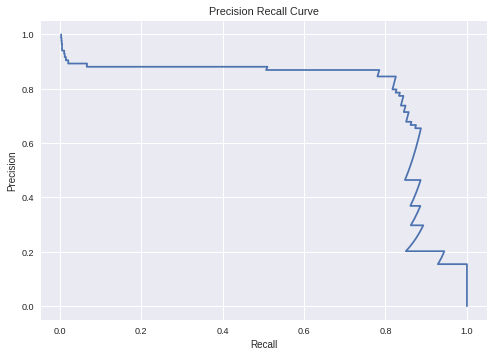

In [0]:
# predicting probability
y_pred_prob = logreg.predict_proba(X_test)[:,1]

# generate precision recall curve values: precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# plot ROC curve
plt.plot(precision, recall)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision Recall Curve')
plt.show()

## CONCLUSION: 
* The highest values for Normal transactions are 25 691.16 while Fraudulent transactions are just 2 125.87. 
* The average value of Normal transactions are small (USD 88.29) compared to Fraudulent transactions that are (USD 122.21)
* The best score was achieved with the SMOTE (OverSampling) and Random Forest, that performed a f2 score of 0.849~ 
* This is a considerably difference by the second best model that is 0.8252 that uses just RandomForests with some HyperParameters.
* The worst model was Logistic Regression where I used GridSearchCV to get the best params to fit and predict where the recall was ~0.6666 and f2 ~0.70.